## Degré de typicalité

#### Dans ce notebook, on effectue de nombreux tests afin de valider l'approche qui est de considérer le degré de typicalité attribut par attribut. En effet, le but est de comprendre la semantique derrière le fait de dire qu'un cluster est plus typique sur un attribut plutot qu'un autre. On partira d'un partionnement effectué en utilisant un des algorithmes de clustering.

In [1]:

# to allow autoreload oµf projet.py
%load_ext autoreload
%autoreload 2
import numpy as np
import copy
from sklearn import preprocessing
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean
import math
import time
from iads_a import kmoyennes as km
from iads_a import fuzz_clustering as fc
from iads_a import awfcm_typicality as at
from tqdm import tqdm
from datetime import datetime as dt
import matplotlib.pyplot as plt


Calcul du degré de typicalité en prenant comme operateurs d'aggregation le minimum entre la ressemblance interne et la dissimilarité externe et le maximum

In [12]:
most_typical = []
for i in best.keys():
    t_max = -999999999
    for x in best[i]:
        t = at.typicality_degree(x,best,best_b,dft,'MIN')
        if t > t_max:
            ind_max = x
            t_max = t
    most_typical.append(tuple((dft.iloc[ind_max]['X'],dft.iloc[ind_max]['Y'])))
    
    

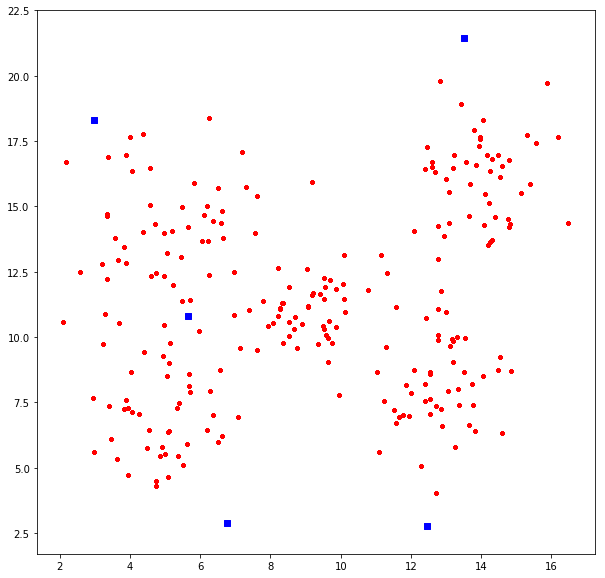

In [13]:
fig0, ax0 = plt.subplots(figsize=(10,10))

for i in range(dft.shape[0]):
    ax0.scatter(dft['X'],dft['Y'],color='r', marker = '.')
for i in range(len(most_typical)):
    ax0.scatter(most_typical[i][0],most_typical[i][1],color='b', marker = 's')

In [25]:
most_typical_max = []
for i in best.keys():
    t_max = -999999999
    for x in best[i]:
        t = at.typicality_degree(x,best,best_b,dft,'MAX')
        if t > t_max:
            ind_max = x
            t_max = t
    most_typical_max.append(tuple((dft.iloc[ind_max]['X'],dft.iloc[ind_max]['Y'])))
    

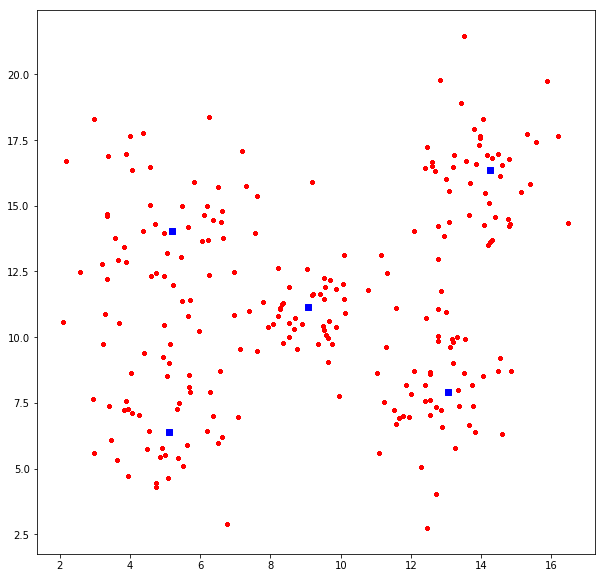

In [26]:
fig0, ax0 = plt.subplots(figsize=(10,10))

for i in range(dft.shape[0]):
    ax0.scatter(dft['X'],dft['Y'],color='r', marker = '.')
for i in range(len(most_typical_max)):
    ax0.scatter(most_typical_max[i][0],most_typical_max[i][1],color='b', marker = 's')

On remarque que le point le plus typique en prenant le min de la dissimilarité et la ressemblance est le point le plus dissimilaire de chaque cluster. En prenant le max, le point le plus typique n'est autre que le centroid de chaque cluster. Ces clusters ont donc une ressemblance interne plus elevée que leurs dissimilarités entre eux

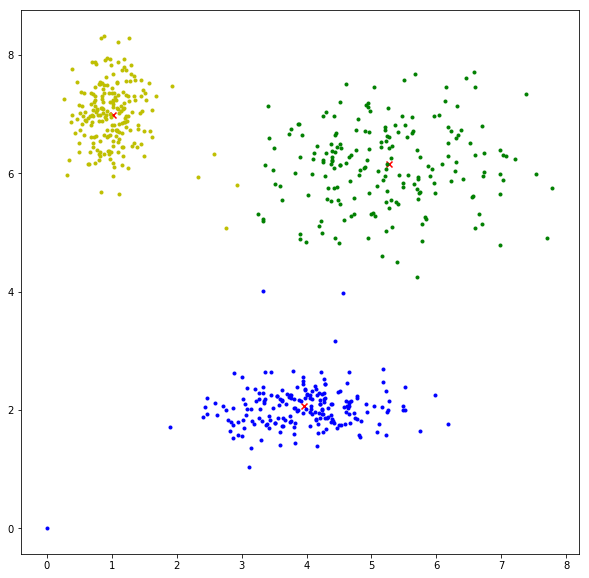

In [29]:
m, c, l, best, best_b = fc.fuzzy_c_means(df3,3)
fc.affiche_resultat(df3,c, best)

/home/hanouti/Téléchargements/Stage/iads_a/fuzz_clustering.py:126: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  for i, k in enumerate(dic):


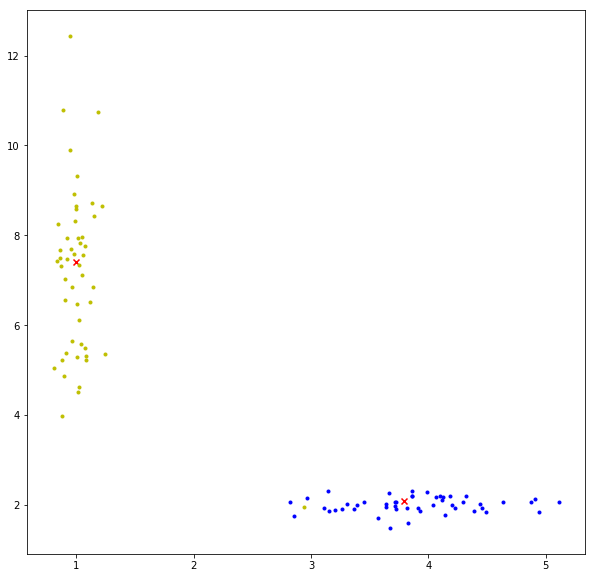

In [20]:
m, c, l, best, best_b = fc.fuzzy_c_means(df2,2)
fc.affiche_resultat(df2,c, best)

On considère l'operateur d'aggregation 0.6*Ressemblance+0.4*Dissimilarité

In [21]:
most_typical_max_b = []
for i in best.keys():
    t_max = -999999999
    for x in best[i]:
        t = at.typicality_degree(x,best,best_b,df2,'60/40')
        if t > t_max:
            ind_max = x
            t_max = t
    most_typical_max_b.append(tuple((df2.iloc[ind_max]['X'],df2.iloc[ind_max]['Y'])))

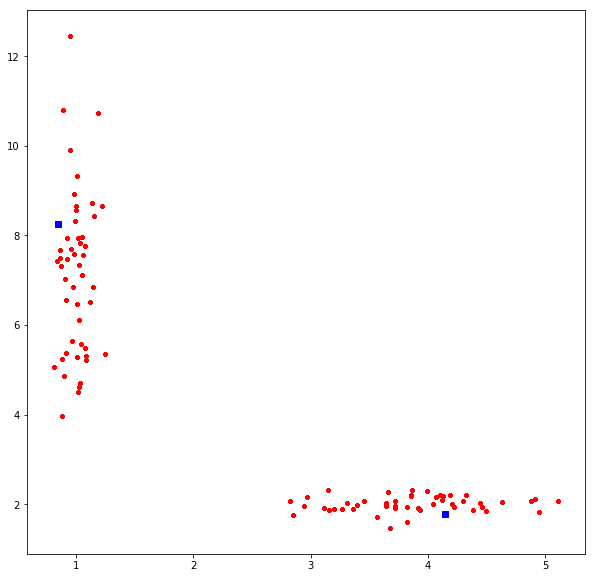

In [22]:
fig0, ax0 = plt.subplots(figsize=(10,10))

for i in range(df2.shape[0]):
    ax0.scatter(df2['X'],df2['Y'],color='r', marker = '.')
for i in range(len(most_typical_max_b)):
    ax0.scatter(most_typical_max_b[i][0],most_typical_max_b[i][1],color='b', marker = 's')

In [136]:
best_memberships, best_centroids, _, aff, w, aff_inv = at.fuzzy_c_means_w(df2,distances)

In [137]:
w

array([[0.74716564, 0.72256805],
       [0.53433333, 0.66818406]])

Ici, on considère un jeu de donnée de tel sorte à ce qu'il y est des valeurs de l'attribut Y qui sont partagées par les deux clusters

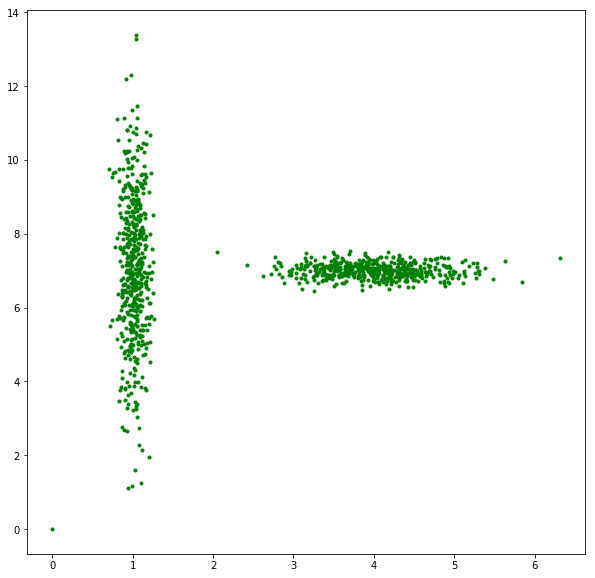

In [16]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 7],
           [1, 7]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.6, 0.2],
          [0.1, 2]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(500) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(500) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(500) * i))

# Visualize the test data

fig0, ax0 = plt.subplots(figsize=(10,10))
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
    color='g')



data = np.zeros((xpts.shape[0],2))
for i in range(xpts.shape[0]):
    data[i] = (xpts[i],ypts[i])

data.shape[1]

df3 = pd.DataFrame(data,columns=['X','Y'])
df3 = df3.iloc[1:]

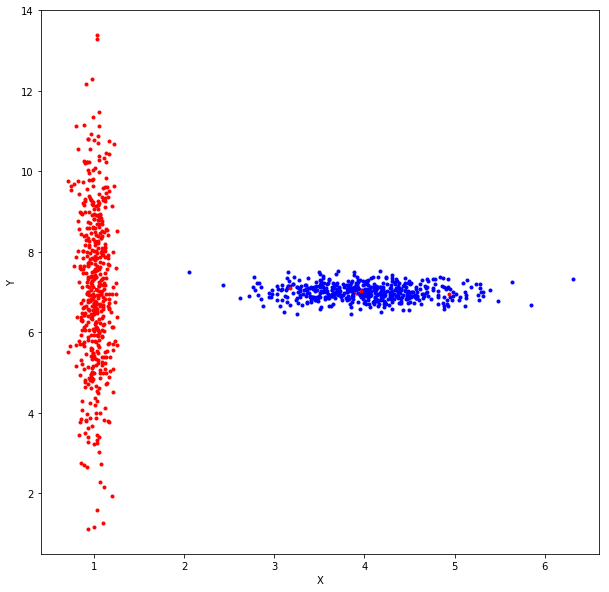

In [17]:
m, c, l, best, best_b = fc.fuzzy_c_means(df3,2)
fc.affiche_resultat(df3,c, best)

In [18]:
print(best.keys())

dict_keys([1, 0])


In [49]:
import itertools
t0 = [a for a in itertools.combinations(df3.values[:,0], 2)]
all_distances0 = []
for v1,v2 in t0:
    all_distances0.append(np.linalg.norm(v1-v2))
t1 = [a for a in itertools.combinations(df3.values[:,1], 2)]
all_distances1 = []
for v1,v2 in t1:
    all_distances1.append(np.linalg.norm(v1-v2))
distances_0 = np.asarray(all_distances0)
distances_1 = np.asarray(all_distances1)
distances = np.array([distances_0, distances_1])

In [57]:
cluster_1 = []
cluster_2 = []
for i in best[0]:
    cluster_1.append((df3.iloc[i]['X'],df3.iloc[i]['Y']))
for i in best[1]:
    cluster_2.append((df3.iloc[i]['X'],df3.iloc[i]['Y']))
cls_1 = np.asarray(cluster_1)
cls_2 = np.asarray(cluster_2)

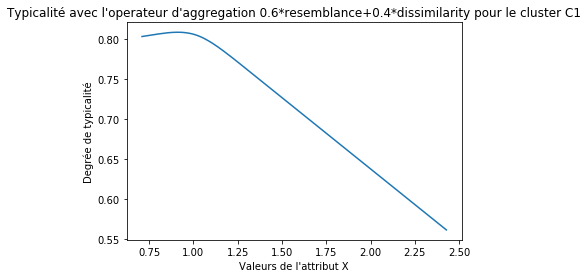

In [50]:
# calculer la typicalité pour l'attribut X pour le premier cluster
typicality = dict()
for i in best[0]:
    typicality[df3.iloc[i][df3.columns[0]]] = at.typicality_degree_w(i, best, best_b, df3,'B',0, distances)
import operator
sorted_typ = sorted(typicality.items(), key=operator.itemgetter(0))
x, y = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.title("Typicalité avec l'operateur d'aggregation 0.6*resemblance+0.4*dissimilarity pour le cluster C1")
plt.xlabel("Valeurs de l'attribut X")
plt.ylabel("Degrée de typicalité")
plt.show()

In [51]:
print('max  ', np.max(np.asarray(list(typicality.values()))))
print('aire sous la courbe ', np.trapz(y,x))
print('moyenne ', np.mean(np.asarray(list(typicality.values()))))

max   0.808267759991067
aire sous la courbe  1.2164077469830679
moyenne  0.8007168612206901


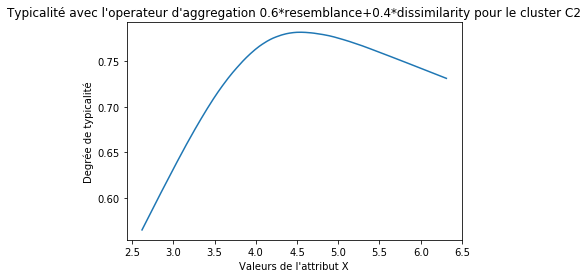

In [52]:
# calculer la typicalité pour l'attribut X pour le deuxieme cluster
typicality = dict()
for i in best[1]:
    typicality[df3.iloc[i][df3.columns[0]]] = at.typicality_degree_w(i, best, best_b, df3,'B',0, distances)
import operator
sorted_typ = sorted(typicality.items(), key=operator.itemgetter(0))
x2, y2 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x2, y2)
plt.title("Typicalité avec l'operateur d'aggregation 0.6*resemblance+0.4*dissimilarity pour le cluster C2")
plt.xlabel("Valeurs de l'attribut X")
plt.ylabel("Degrée de typicalité")
plt.show()

In [53]:
print('max  ', np.max(np.asarray(list(typicality.values()))))
print('aire sous la courbe ', np.trapz(y2,x2))
print('moyenne ', np.mean(np.asarray(list(typicality.values()))))

max   0.7818535999262222
aire sous la courbe  2.701373343322416
moyenne  0.7439069592830191


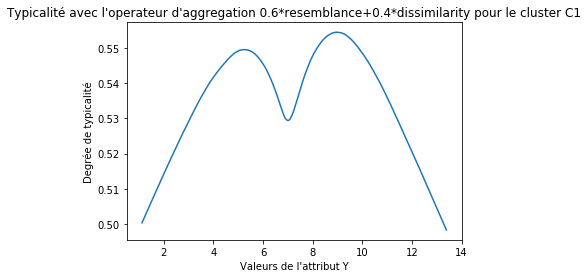

In [54]:
# calculer la typicalité pour l'attribut Y pour le premier cluster
typicality = dict()
for i in best[0]:
    typicality[df3.iloc[i][df3.columns[1]]] = at.typicality_degree_w(i, best, best_b, df3,'B',1, distances)
import operator
sorted_typ = sorted(typicality.items(), key=operator.itemgetter(0))
x3, y3 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x3, y3)
plt.title("Typicalité avec l'operateur d'aggregation 0.6*resemblance+0.4*dissimilarity pour le cluster C1")
plt.xlabel("Valeurs de l'attribut Y")
plt.ylabel("Degrée de typicalité")
plt.show()

In [55]:
print('max  ', np.max(np.asarray(list(typicality.values()))))
print('aire sous la courbe ', np.trapz(y3,x3))
print('moyenne ', np.mean(np.asarray(list(typicality.values()))))

max   0.5543854007758426
aire sous la courbe  6.5559998758659175
moyenne  0.5427965528541432


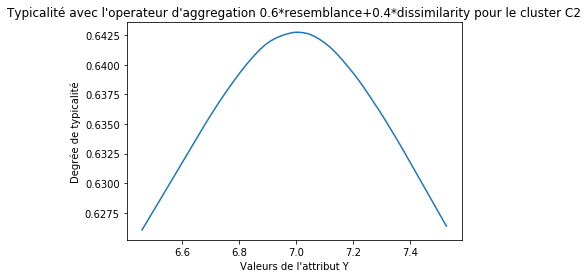

In [56]:
# calculer la typicalité pour l'attribut Y pour le deuxieme cluster
typicality = dict()
for i in best[1]:
    typicality[df3.iloc[i][df3.columns[1]]] = at.typicality_degree_w(i, best, best_b, df3,'B',1, distances)
import operator
sorted_typ = sorted(typicality.items(), key=operator.itemgetter(0))
x4, y4 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x4, y4)
plt.title("Typicalité avec l'operateur d'aggregation 0.6*resemblance+0.4*dissimilarity pour le cluster C2")
plt.xlabel("Valeurs de l'attribut Y")
plt.ylabel("Degrée de typicalité")
plt.show()

In [57]:
print('max  ', np.max(np.asarray(list(typicality.values()))))
print('aire sous la courbe ', np.trapz(y4,x4))
print('moyenne ', np.mean(np.asarray(list(typicality.values()))))

max   0.6427356286551209
aire sous la courbe  0.6780940279937386
moyenne  0.6398319057493326


In [36]:
area_Y_C2 = np.trapz(y,x)

In [38]:
print("Premier cluster sur l'attribut X", area_X_C1)
print("Premier cluster sur l'attribut Y", area_Y_C1)

Premier cluster sur l'attribut X 1.2164077469830679
Premier cluster sur l'attribut Y 6.5559998758659175


In [37]:
print("2e cluster sur l'attribut X", area_X_C2)
print("2e cluster sur l'attribut Y", area_Y_C2)

2e cluster sur l'attribut X 2.701373343322416
2e cluster sur l'attribut Y 0.6780940279937386


In [61]:
print(area_Y_C2/(y_max_C2-y_min_C2))

0.6361980087473794


In [62]:
print(area_X_C2/(x_max_C2-x_min_C2))

0.7315260759019782


In [60]:
x_max_C2 = np.max(cls_2[:,0])
x_min_C2 = np.min(cls_2[:,0])
y_max_C2 = np.max(cls_2[:,1])
y_min_C2 = np.min(cls_2[:,1])

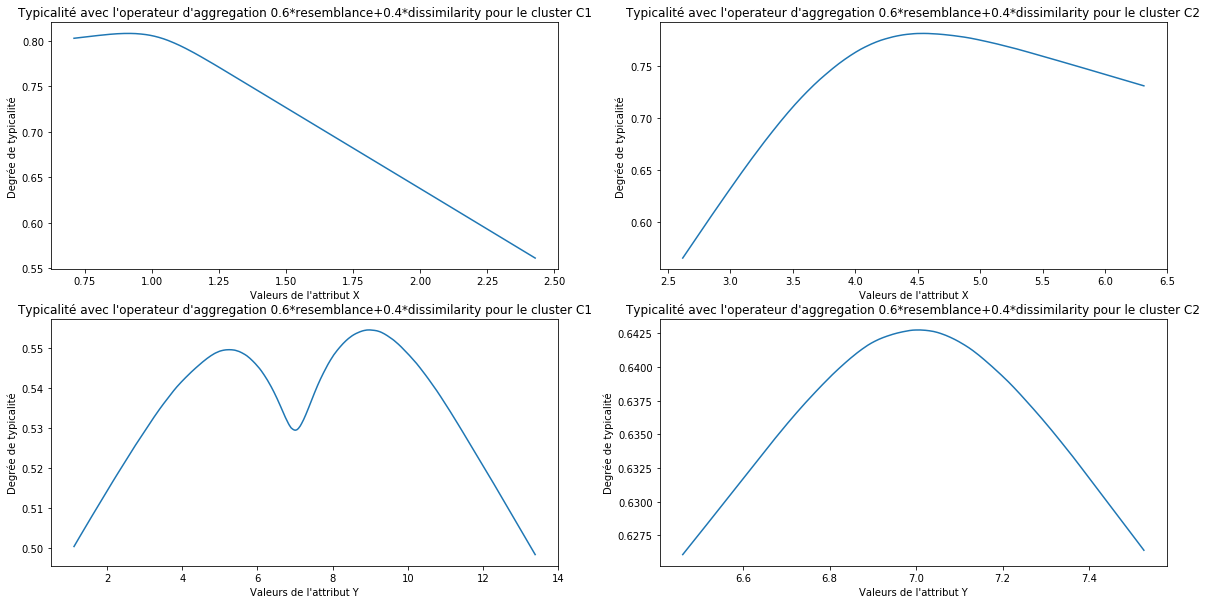

In [58]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax1.plot(x, y)
ax1.set_title("Typicalité avec l'operateur d'aggregation 0.6*resemblance+0.4*dissimilarity pour le cluster C1")
ax1.set_xlabel("Valeurs de l'attribut X")
ax1.set_ylabel("Degrée de typicalité")

ax2 = plt.subplot(222)
ax2.plot(x2, y2)
ax2.set_title("Typicalité avec l'operateur d'aggregation 0.6*resemblance+0.4*dissimilarity pour le cluster C2")
ax2.set_xlabel("Valeurs de l'attribut X")
ax2.set_ylabel("Degrée de typicalité")

ax3 = plt.subplot(223)
ax3.plot(x3, y3)
ax3.set_title("Typicalité avec l'operateur d'aggregation 0.6*resemblance+0.4*dissimilarity pour le cluster C1")
ax3.set_xlabel("Valeurs de l'attribut Y")
ax3.set_ylabel("Degrée de typicalité")
ax4 = plt.subplot(224)
ax4.plot(x4, y4)
ax4.set_title("Typicalité avec l'operateur d'aggregation 0.6*resemblance+0.4*dissimilarity pour le cluster C2")
ax4.set_xlabel("Valeurs de l'attribut Y")
ax4.set_ylabel("Degrée de typicalité")
plt.show()

On remarque que pour l'attribut Y, les valeurs partagées par les deux clusters sont logiquement moins typique pour le cluster C1 etant donnée qu'elles sont assez similaire aux valeurs de Y pour le cluster C2 d'ou la courbe en forme de "deux bosses". En considérant l'attribut X, le cluster C1 a une ressemblance interne elevée, cependant, lorsque les valeurs se rapprochent de celles de cluster C2, la dissimilarité diminue ce qui fait qu'on a une courbe decroissante.

### Ressemblance

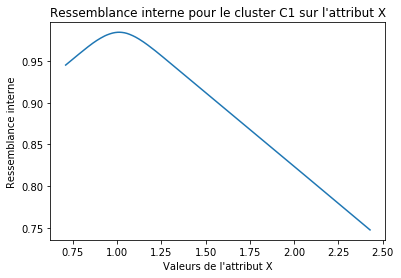

In [59]:
# calculer la typicalité pour l'attribut X pour le premier cluster
resemblance = dict()
for i in best[0]:
    resemblance[df3.iloc[i][df3.columns[0]]] = at.resemblance_w(i, best, best_b, df3,0,distances)
import operator
sorted_typ = sorted(resemblance.items(), key=operator.itemgetter(0))
x1, y1 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x1, y1)
plt.title("Ressemblance interne pour le cluster C1 sur l'attribut X")
plt.xlabel("Valeurs de l'attribut X")
plt.ylabel("Ressemblance interne")
plt.show()

In [60]:
print('max', np.max(np.asarray(list(resemblance.values()))))
print('aire sous la courbe ', np.trapz(y1,x1))
print('moyenne ', np.mean(np.asarray(list(resemblance.values()))))

max 0.984799140671965
aire sous la courbe  1.5280931957473611
moyenne  0.9780099691805482


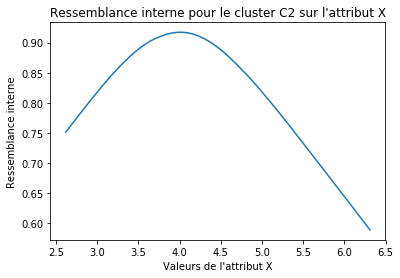

In [61]:
# calculer la typicalité pour l'attribut X pour le deuxieme cluster
resemblance = dict()
for i in best[1]:
    resemblance[df3.iloc[i][df3.columns[0]]] = at.resemblance_w(i, best, best_b, df3,0,distances)
import operator
sorted_typ = sorted(resemblance.items(), key=operator.itemgetter(0))
x2, y2 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x2, y2)
plt.title("Ressemblance interne pour le cluster C2 sur l'attribut X")
plt.xlabel("Valeurs de l'attribut X")
plt.ylabel("Ressemblance interne")
plt.show()

In [62]:
print('max', np.max(np.asarray(list(resemblance.values()))))
print('aire sous la courbe ', np.trapz(y2,x2))
print('moyenne ', np.mean(np.asarray(list(resemblance.values()))))

max 0.9173086707249766
aire sous la courbe  2.9861727934442523
moyenne  0.8833267992844298


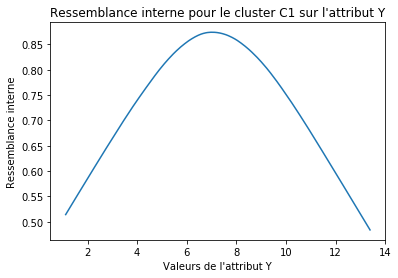

In [63]:
# calculer la typicalité pour l'attribut Y pour le premier cluster
resemblance = dict()
for i in best[0]:
    resemblance[df3.iloc[i][df3.columns[1]]] = at.resemblance_w(i, best, best_b, df3,1,distances)
import operator
sorted_typ = sorted(resemblance.items(), key=operator.itemgetter(0))
x3, y3 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x3, y3)
plt.title("Ressemblance interne pour le cluster C1 sur l'attribut Y")
plt.xlabel("Valeurs de l'attribut Y")
plt.ylabel("Ressemblance interne")
plt.show()

In [64]:
print('max', np.max(np.asarray(list(resemblance.values()))))
print('aire sous la courbe ', np.trapz(y3,x3))
print('moyenne ', np.mean(np.asarray(list(resemblance.values()))))

max 0.8739020563499003
aire sous la courbe  8.8767767228356
moyenne  0.8203390259209914


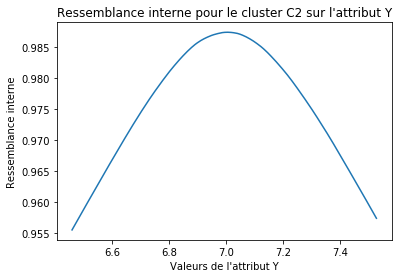

In [65]:
# calculer la typicalité pour l'attribut Y pour le deuxieme cluster
resemblance = dict()
for i in best[1]:
    resemblance[df3.iloc[i][df3.columns[1]]] = at.resemblance_w(i, best, best_b, df3,1,distances)
import operator
sorted_typ = sorted(resemblance.items(), key=operator.itemgetter(0))
x4, y4 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x4, y4)
plt.title("Ressemblance interne pour le cluster C2 sur l'attribut Y")
plt.xlabel("Valeurs de l'attribut Y")
plt.ylabel("Ressemblance interne")
plt.show()

In [66]:
print('max', np.max(np.asarray(list(resemblance.values()))))
print('aire sous la courbe ', np.trapz(y4,x4))
print('moyenne ', np.mean(np.asarray(list(resemblance.values()))))

max 0.9873282127403411
aire sous la courbe  1.0395587699076678
moyenne  0.9820646140796404


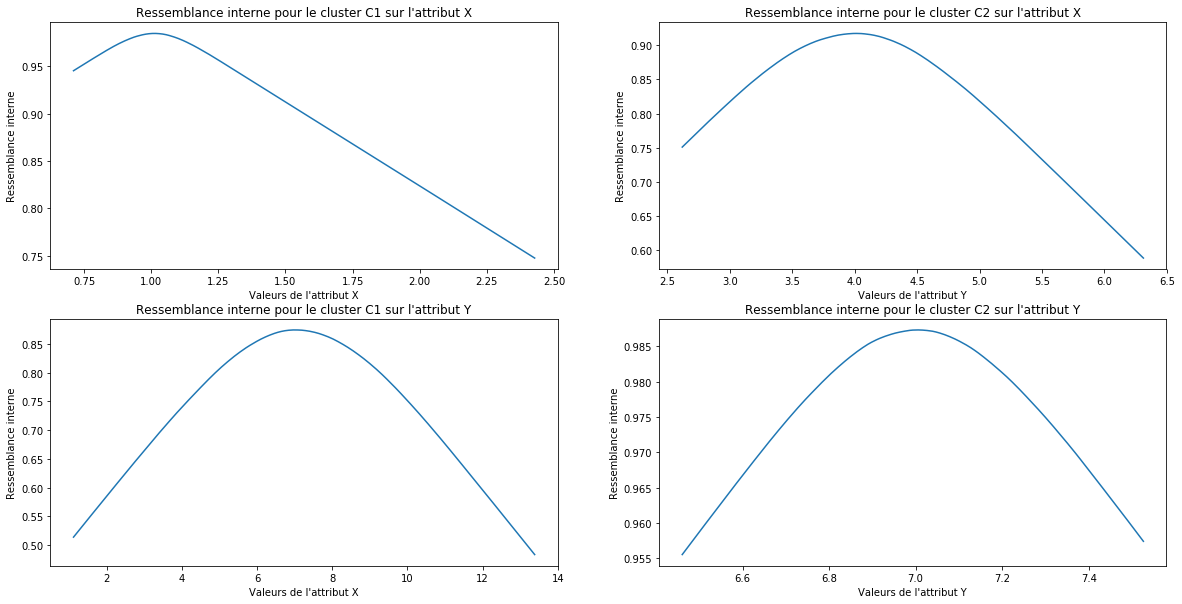

In [67]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax1.plot(x1, y1)
ax1.set_title("Ressemblance interne pour le cluster C1 sur l'attribut X")
ax1.set_xlabel("Valeurs de l'attribut X")
ax1.set_ylabel("Ressemblance interne")

ax2 = plt.subplot(222)
ax2.plot(x2, y2)
ax2.set_title("Ressemblance interne pour le cluster C2 sur l'attribut X")
ax2.set_xlabel("Valeurs de l'attribut Y")
ax2.set_ylabel("Ressemblance interne")

ax3 = plt.subplot(223)
ax3.plot(x3, y3)
ax3.set_title("Ressemblance interne pour le cluster C1 sur l'attribut Y")
ax3.set_xlabel("Valeurs de l'attribut X")
ax3.set_ylabel("Ressemblance interne")
ax4 = plt.subplot(224)
ax4.plot(x4, y4)
ax4.set_title("Ressemblance interne pour le cluster C2 sur l'attribut Y")
ax4.set_xlabel("Valeurs de l'attribut Y")
ax4.set_ylabel("Ressemblance interne")
plt.show()

En considérant uniquement la ressemblance interne, on observe que cette derniere est elevée et varie moins pour le cluster C2 sur l'attribut Y, observation similaire pour le cluster C1 sur l'attribut X. 

### Dissimilarité 

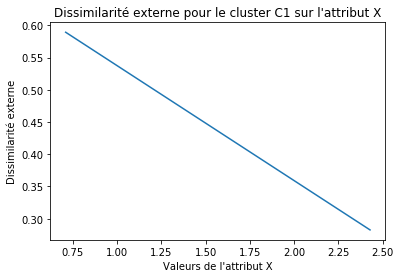

In [68]:
# calculer la typicalité pour l'attribut X pour le premier cluster
dissimilarity = dict()
for i in best[0]:
    dissimilarity[df3.iloc[i][df3.columns[0]]] = at.dissimilarity_w(i, best, best_b, df3,0,distances)
import operator
sorted_typ = sorted(dissimilarity.items(), key=operator.itemgetter(0))
x1, y1 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x1, y1)
plt.title("Dissimilarité externe pour le cluster C1 sur l'attribut X")
plt.xlabel("Valeurs de l'attribut X")
plt.ylabel("Dissimilarité externe")
plt.show()

In [69]:
print('max', np.max(np.asarray(list(dissimilarity.values()))))
print('aire sous la courbe ', np.trapz(y1,x1))
print('moyenne ', np.mean(np.asarray(list(dissimilarity.values()))))

max 0.5892966333568374
aire sous la courbe  0.7488795738366285
moyenne  0.534777199280903


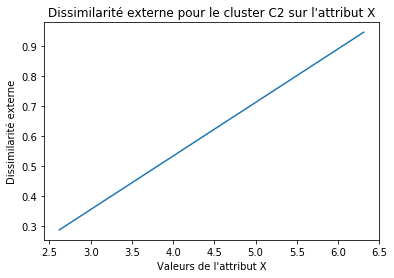

In [70]:
# calculer la typicalité pour l'attribut X pour le deuxieme cluster
dissimilarity = dict()
for i in best[1]:
    dissimilarity[df3.iloc[i][df3.columns[0]]] = at.dissimilarity_w(i, best, best_b, df3,0,distances)
import operator
sorted_typ = sorted(dissimilarity.items(), key=operator.itemgetter(0))
x2, y2 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x2, y2)
plt.title("Dissimilarité externe pour le cluster C2 sur l'attribut X")
plt.xlabel("Valeurs de l'attribut X")
plt.ylabel("Dissimilarité externe")
plt.show()

In [71]:
print('max', np.max(np.asarray(list(dissimilarity.values()))))
print('aire sous la courbe ', np.trapz(y2,x2))
print('moyenne ', np.mean(np.asarray(list(dissimilarity.values()))))

max 0.9454805659240658
aire sous la courbe  2.2741741681396612
moyenne  0.5347771992809031


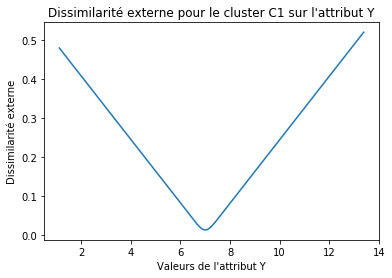

In [72]:
# calculer la typicalité pour l'attribut Y pour le premier cluster
dissimilarity = dict()
for i in best[0]:
    dissimilarity[df3.iloc[i][df3.columns[1]]] = at.dissimilarity_w(i, best, best_b, df3,1,distances)
import operator
sorted_typ = sorted(dissimilarity.items(), key=operator.itemgetter(0))
x3, y3 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x3, y3)
plt.title("Dissimilarité externe pour le cluster C1 sur l'attribut Y")
plt.xlabel("Valeurs de l'attribut Y")
plt.ylabel("Dissimilarité externe")
plt.show()

In [73]:
print('max', np.max(np.asarray(list(dissimilarity.values()))))
print('aire sous la courbe ', np.trapz(y3,x3))
print('moyenne ', np.mean(np.asarray(list(dissimilarity.values()))))

max 0.5201915334628928
aire sous la courbe  3.0748346054113957
moyenne  0.12648284325387107


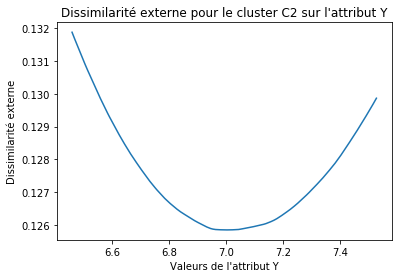

In [74]:
# calculer la typicalité pour l'attribut Y pour le deuxieme cluster
dissimilarity = dict()
for i in best[1]:
    dissimilarity[df3.iloc[i][df3.columns[1]]] = at.dissimilarity_w(i, best, best_b, df3,1,distances)
import operator
sorted_typ = sorted(dissimilarity.items(), key=operator.itemgetter(0))
x4, y4 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x4, y4)
plt.title("Dissimilarité externe pour le cluster C2 sur l'attribut Y")
plt.xlabel("Valeurs de l'attribut Y")
plt.ylabel("Dissimilarité externe")
plt.show()

In [75]:
print('max', np.max(np.asarray(list(dissimilarity.values()))))
print('aire sous la courbe ', np.trapz(y4,x4))
print('moyenne ', np.mean(np.asarray(list(dissimilarity.values()))))

max 0.13187767913697576
aire sous la courbe  0.13589691512284469
moyenne  0.12648284325387107


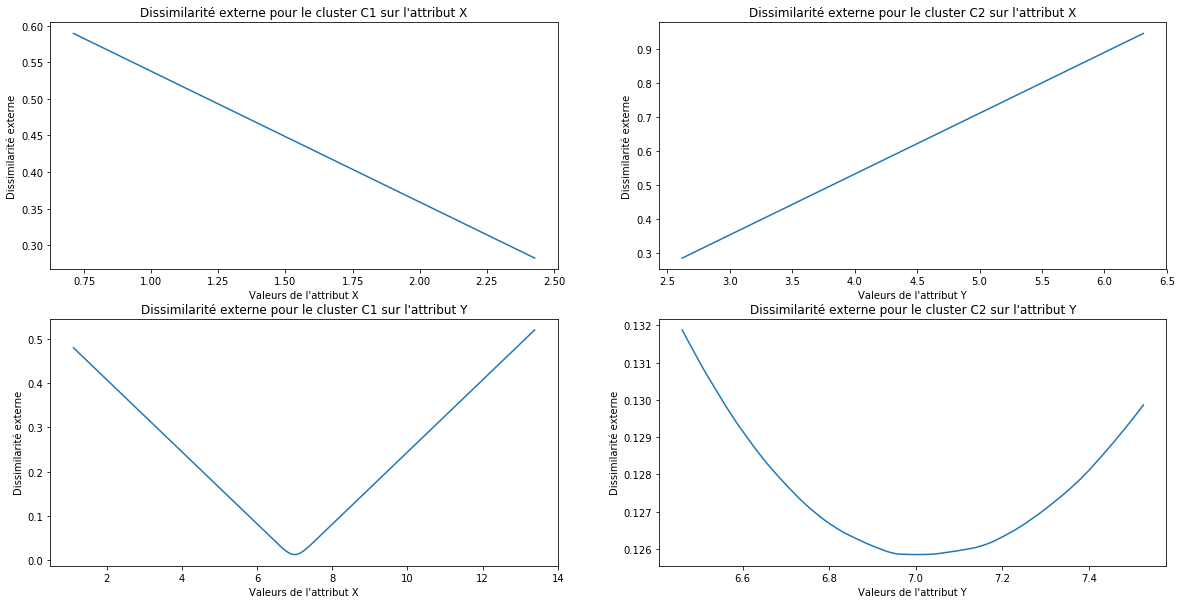

In [76]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax1.plot(x1, y1)
ax1.set_title("Dissimilarité externe pour le cluster C1 sur l'attribut X")
ax1.set_xlabel("Valeurs de l'attribut X")
ax1.set_ylabel("Dissimilarité externe")

ax2 = plt.subplot(222)
ax2.plot(x2, y2)
ax2.set_title("Dissimilarité externe pour le cluster C2 sur l'attribut X")
ax2.set_xlabel("Valeurs de l'attribut Y")
ax2.set_ylabel("Dissimilarité externe")

ax3 = plt.subplot(223)
ax3.plot(x3, y3)
ax3.set_title("Dissimilarité externe pour le cluster C1 sur l'attribut Y")
ax3.set_xlabel("Valeurs de l'attribut X")
ax3.set_ylabel("Dissimilarité externe")
ax4 = plt.subplot(224)
ax4.plot(x4, y4)
ax4.set_title("Dissimilarité externe pour le cluster C2 sur l'attribut Y")
ax4.set_xlabel("Valeurs de l'attribut Y")
ax4.set_ylabel("Dissimilarité externe")
plt.show() 

En prenant en compte uniquement la dissimilarité, sur l'attribut Y, les valeurs en commun entre les deux cluster ont logiquement une dissimilarité externe tres faible pour le cluster C1 et pour le cluster C2. sur l'attribut X, on a des valeurs decroissantes lorsque les valeurs de cet attribut deviennent proches pour les deux clusters.

### On effectue des tests similaires sur un autre partitionnement ou aucun des deux clusters parait plus typique sur un attribut plutot qu'un autre

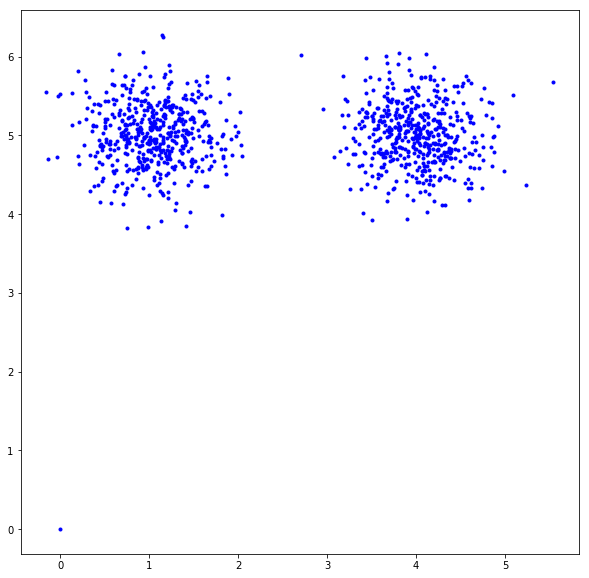

In [12]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 5],
           [1, 5]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.4, 0.4],
          [0.4, 0.4]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(500) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(500) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(500) * i))

# Visualize the test data

fig0, ax0 = plt.subplots(figsize=(10,10))
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
    color='b')



data = np.zeros((xpts.shape[0],2))
for i in range(xpts.shape[0]):
    data[i] = (xpts[i],ypts[i])

data.shape[1]

df = pd.DataFrame(data,columns=['X','Y'])
df = df.iloc[1:]

/home/hanouti/Téléchargements/Stage/iads_a/fuzz_clustering.py:125: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  data = df.loc[dic[k]]


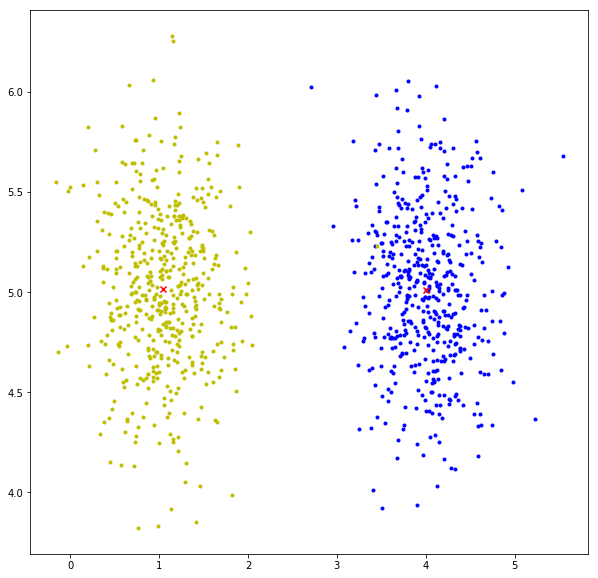

In [15]:
m, c, l, best, best_b = fc.fuzzy_c_means(df,2)
fc.affiche_resultat(df,c, best)

In [13]:
import itertools
t0 = [a for a in itertools.combinations(df.values[:,0], 2)]
all_distances0 = []
for v1,v2 in t0:
    all_distances0.append(np.linalg.norm(v1-v2))
t1 = [a for a in itertools.combinations(df.values[:,1], 2)]
all_distances1 = []
for v1,v2 in t1:
    all_distances1.append(np.linalg.norm(v1-v2))
distances_0 = np.asarray(all_distances0)
distances_1 = np.asarray(all_distances1)
distances = np.array([distances_0, distances_1])

### Typicality 
#### Agg = 0.6 * Resemblance + 0.4 * dissimilarity

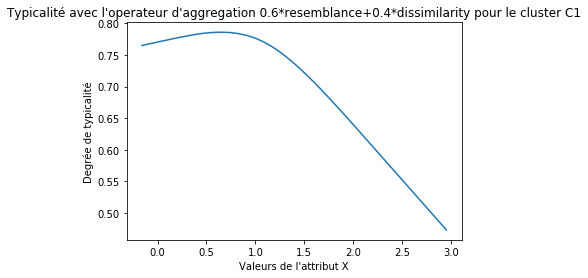

In [14]:
# calculer la typicalité pour l'attribut X pour le premier cluster
typicality = dict()
for i in best[0]:
    typicality[df.iloc[i][df.columns[0]]] = at.typicality_degree_w(i, best, best_b, df,'B',0, distances)
import operator
sorted_typ = sorted(typicality.items(), key=operator.itemgetter(0))
x1, y1 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x1, y1)
plt.title("Typicalité avec l'operateur d'aggregation 0.6*resemblance+0.4*dissimilarity pour le cluster C1")
plt.xlabel("Valeurs de l'attribut X")
plt.ylabel("Degrée de typicalité")
plt.show()

In [27]:
print('max X_C1 ', np.max(np.asarray(list(typicality.values()))))
print('aire sous la courbe ', np.trapz(y,x))
print('moyenne ', np.mean(np.asarray(list(typicality.values()))))

max X_C1  0.7861671062653552
aire sous la courbe  1.6462060093968587
moyenne  0.7595619775358674


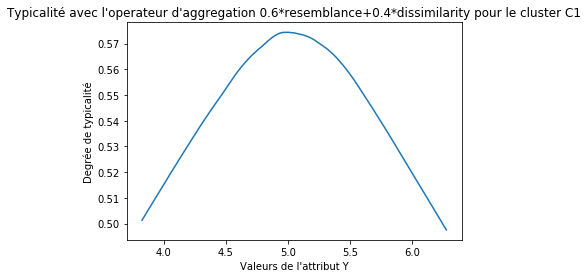

In [15]:
# calculer la typicalité pour l'attribut Y pour le premier cluster
typicality = dict()
for i in best[0]:
    typicality[df.iloc[i][df.columns[1]]] = at.typicality_degree_w(i, best, best_b, df,'B',1, distances)
import operator
sorted_typ = sorted(typicality.items(), key=operator.itemgetter(0))
x2, y2 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x2, y2)
plt.title("Typicalité avec l'operateur d'aggregation 0.6*resemblance+0.4*dissimilarity pour le cluster C1")
plt.xlabel("Valeurs de l'attribut Y")
plt.ylabel("Degrée de typicalité")
plt.show()

In [29]:
print('max', np.max(np.asarray(list(typicality.values()))))
print('aire sous la courbe ', np.trapz(y,x))
print('moyenne ', np.mean(np.asarray(list(typicality.values()))))

max X_C1  0.5749937660212142
aire sous la courbe  1.3355442785456666
moyenne  0.5639162194270039


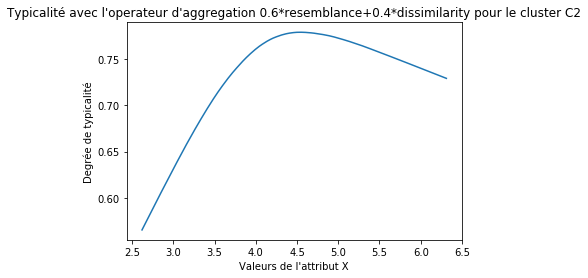

In [16]:
# calculer la typicalité pour l'attribut X pour le deuxieme cluster
typicality = dict()
for i in best[1]:
    typicality[df3.iloc[i][df3.columns[0]]] = at.typicality_degree_w(i, best, best_b, df3,'B',0, distances)
import operator
sorted_typ = sorted(typicality.items(), key=operator.itemgetter(0))
x3, y3 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x3, y3)
plt.title("Typicalité avec l'operateur d'aggregation 0.6*resemblance+0.4*dissimilarity pour le cluster C2")
plt.xlabel("Valeurs de l'attribut X")
plt.ylabel("Degrée de typicalité")
plt.show()

In [31]:
print('max', np.max(np.asarray(list(typicality.values()))))
print('aire sous la courbe ', np.trapz(y,x))
print('moyenne ', np.mean(np.asarray(list(typicality.values()))))

max 0.7783657184689269
aire sous la courbe  2.983909830456348
moyenne  0.7403339616206274


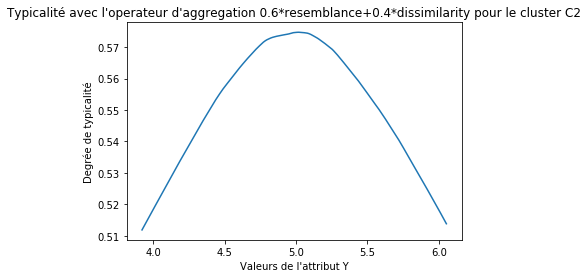

In [17]:
# calculer la typicalité pour l'attribut Y pour le deuxieme cluster
typicality = dict()
for i in best[1]:
    typicality[df.iloc[i][df.columns[1]]] = at.typicality_degree_w(i, best, best_b, df,'B',1, distances)
import operator
sorted_typ = sorted(typicality.items(), key=operator.itemgetter(0))
x4, y4 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x4, y4)
plt.title("Typicalité avec l'operateur d'aggregation 0.6*resemblance+0.4*dissimilarity pour le cluster C2")
plt.xlabel("Valeurs de l'attribut Y")
plt.ylabel("Degrée de typicalité")
plt.show()

In [33]:
print('max', np.max(np.asarray(list(typicality.values()))))
print('aire sous la courbe ', np.trapz(y,x))
print('moyenne ', np.mean(np.asarray(list(typicality.values()))))

max 0.5741533376360187
aire sous la courbe  1.173560585884363
moyenne  0.5638119644647223


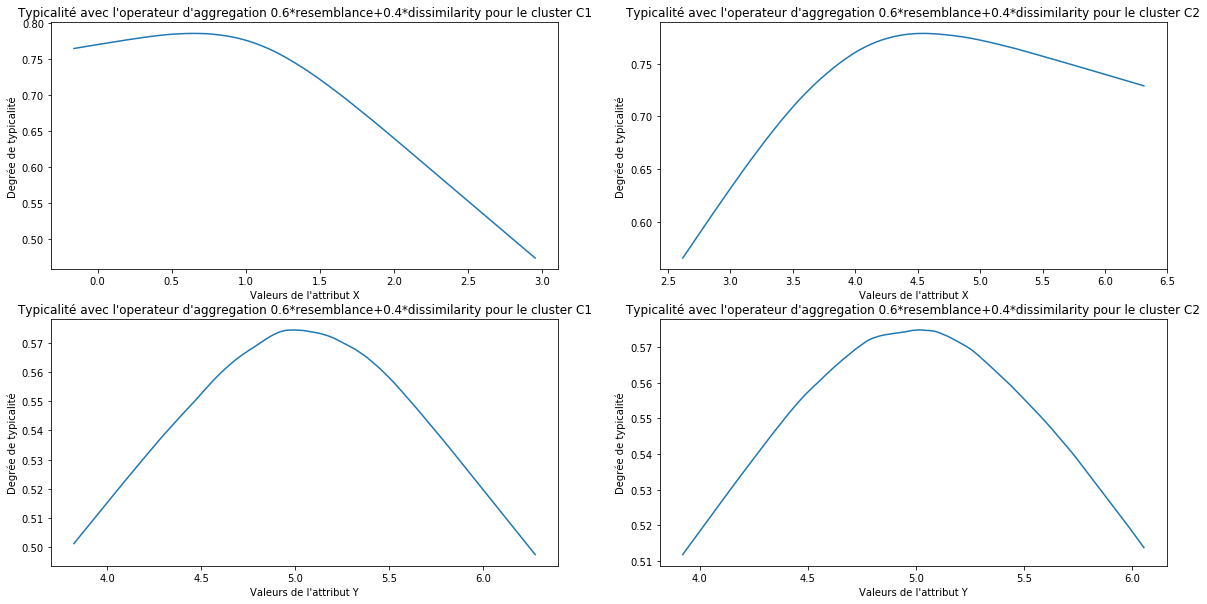

In [24]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax1.plot(x1, y1)
ax1.set_title("Typicalité avec l'operateur d'aggregation 0.6*resemblance+0.4*dissimilarity pour le cluster C1")
ax1.set_xlabel("Valeurs de l'attribut X")
ax1.set_ylabel("Degrée de typicalité")

ax2 = plt.subplot(222)
ax2.plot(x3, y3)
ax2.set_title("Typicalité avec l'operateur d'aggregation 0.6*resemblance+0.4*dissimilarity pour le cluster C2")
ax2.set_xlabel("Valeurs de l'attribut X")
ax2.set_ylabel("Degrée de typicalité")

ax3 = plt.subplot(223)
ax3.plot(x2, y2)
ax3.set_title("Typicalité avec l'operateur d'aggregation 0.6*resemblance+0.4*dissimilarity pour le cluster C1")
ax3.set_xlabel("Valeurs de l'attribut Y")
ax3.set_ylabel("Degrée de typicalité")
ax4 = plt.subplot(224)
ax4.plot(x4, y4)
ax4.set_title("Typicalité avec l'operateur d'aggregation 0.6*resemblance+0.4*dissimilarity pour le cluster C2")
ax4.set_xlabel("Valeurs de l'attribut Y")
ax4.set_ylabel("Degrée de typicalité")
plt.show()

Sur l'attribut Y, on a des valeurs de typicalité similaires pour les deux clusters, visuellement, cela se remarque aisément.

### Resemblance

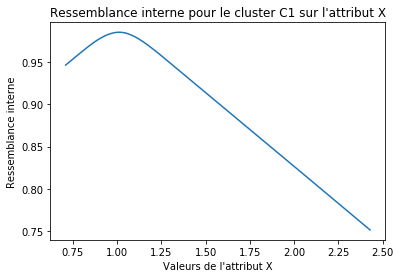

In [42]:
# calculer la typicalité pour l'attribut X pour le premier cluster
resemblance = dict()
for i in best[0]:
    resemblance[df3.iloc[i][df3.columns[0]]] = at.resemblance_w(i, best, best_b, df3,0,distances)
import operator
sorted_typ = sorted(resemblance.items(), key=operator.itemgetter(0))
x1, y1 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x1, y1)
plt.title("Ressemblance interne pour le cluster C1 sur l'attribut X")
plt.xlabel("Valeurs de l'attribut X")
plt.ylabel("Ressemblance interne")
plt.show()

In [35]:
print('max', np.max(np.asarray(list(resemblance.values()))))
print('aire sous la courbe ', np.trapz(y,x))
print('moyenne ', np.mean(np.asarray(list(resemblance.values()))))

max 0.9858662474941544
aire sous la courbe  0.5346030792605708
moyenne  0.9799475549403656


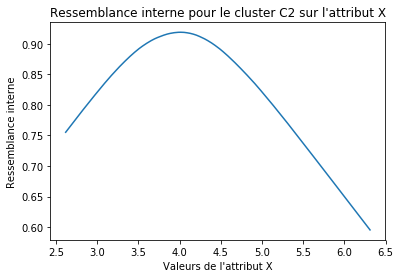

In [43]:
# calculer la typicalité pour l'attribut X pour le deuxieme cluster
resemblance = dict()
for i in best[1]:
    resemblance[df3.iloc[i][df3.columns[0]]] = at.resemblance_w(i, best, best_b, df3,0,distances)
import operator
sorted_typ = sorted(resemblance.items(), key=operator.itemgetter(0))
x2, y2 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x2, y2)
plt.title("Ressemblance interne pour le cluster C2 sur l'attribut X")
plt.xlabel("Valeurs de l'attribut X")
plt.ylabel("Ressemblance interne")
plt.show()

In [37]:
print('max', np.max(np.asarray(list(resemblance.values()))))
print('aire sous la courbe ', np.trapz(y,x))
print('moyenne ', np.mean(np.asarray(list(resemblance.values()))))

max 0.9178190411678404
aire sous la courbe  3.393677393458245
moyenne  0.8837768167275007


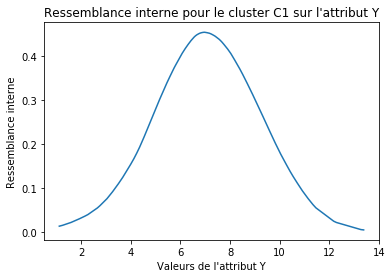

In [44]:
# calculer la typicalité pour l'attribut Y pour le premier cluster
resemblance = dict()
for i in best[0]:
    resemblance[df3.iloc[i][df3.columns[1]]] = at.resemblance_w(i, best, best_b, df3,1,distances)
import operator
sorted_typ = sorted(resemblance.items(), key=operator.itemgetter(0))
x3, y3 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x3, y3)
plt.title("Ressemblance interne pour le cluster C1 sur l'attribut Y")
plt.xlabel("Valeurs de l'attribut Y")
plt.ylabel("Ressemblance interne")
plt.show()

In [40]:
print('max', np.max(np.asarray(list(resemblance.values()))))
print('aire sous la courbe ', np.trapz(y,x))
print('moyenne ', np.mean(np.asarray(list(resemblance.values()))))

max 0.45207235902231796
aire sous la courbe  2.4186294253232936
moyenne  0.33470295582230586


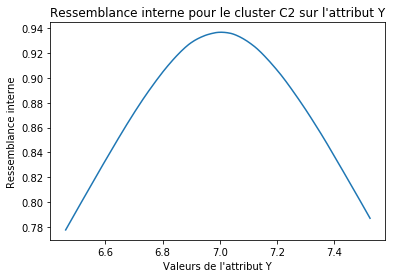

In [45]:
# calculer la typicalité pour l'attribut Y pour le deuxieme cluster
resemblance = dict()
for i in best[1]:
    resemblance[df3.iloc[i][df3.columns[1]]] = at.resemblance_w(i, best, best_b, df3,1,distances)
import operator
sorted_typ = sorted(resemblance.items(), key=operator.itemgetter(0))
x4, y4 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x4, y4)
plt.title("Ressemblance interne pour le cluster C2 sur l'attribut Y")
plt.xlabel("Valeurs de l'attribut Y")
plt.ylabel("Ressemblance interne")
plt.show()

In [42]:
print('max', np.max(np.asarray(list(resemblance.values()))))
print('aire sous la courbe ', np.trapz(y,x))
print('moyenne ', np.mean(np.asarray(list(resemblance.values()))))

max 0.936350532809065
aire sous la courbe  0.934198030550913
moyenne  0.909876343268555


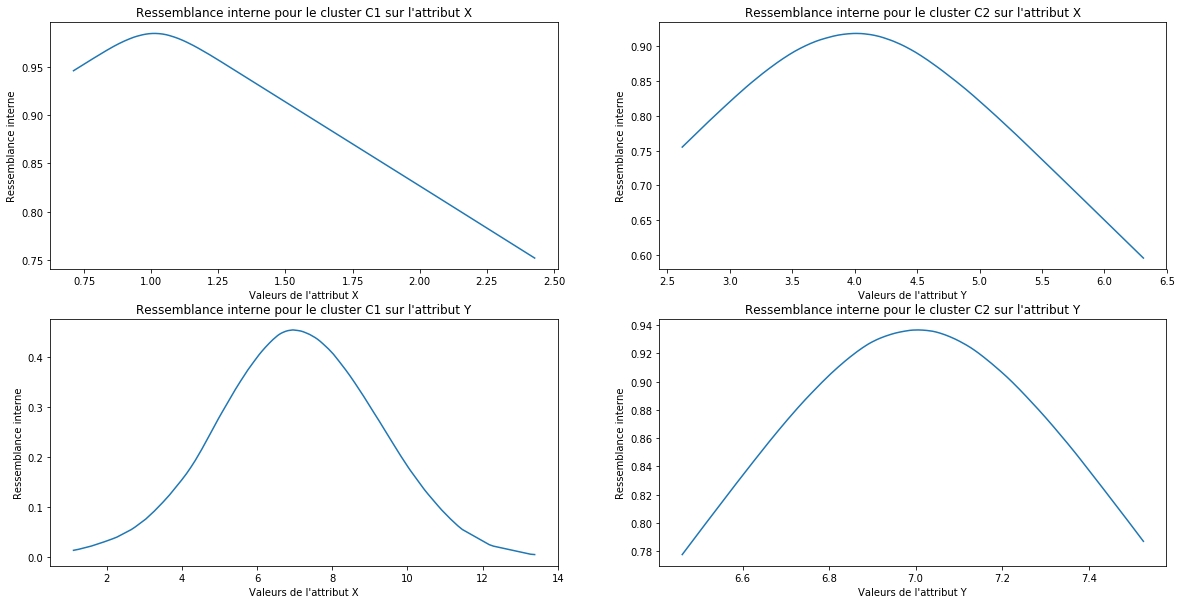

In [46]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax1.plot(x1, y1)
ax1.set_title("Ressemblance interne pour le cluster C1 sur l'attribut X")
ax1.set_xlabel("Valeurs de l'attribut X")
ax1.set_ylabel("Ressemblance interne")

ax2 = plt.subplot(222)
ax2.plot(x2, y2)
ax2.set_title("Ressemblance interne pour le cluster C2 sur l'attribut X")
ax2.set_xlabel("Valeurs de l'attribut Y")
ax2.set_ylabel("Ressemblance interne")

ax3 = plt.subplot(223)
ax3.plot(x3, y3)
ax3.set_title("Ressemblance interne pour le cluster C1 sur l'attribut Y")
ax3.set_xlabel("Valeurs de l'attribut X")
ax3.set_ylabel("Ressemblance interne")
ax4 = plt.subplot(224)
ax4.plot(x4, y4)
ax4.set_title("Ressemblance interne pour le cluster C2 sur l'attribut Y")
ax4.set_xlabel("Valeurs de l'attribut Y")
ax4.set_ylabel("Ressemblance interne")
plt.show() 

### Dissimilarity

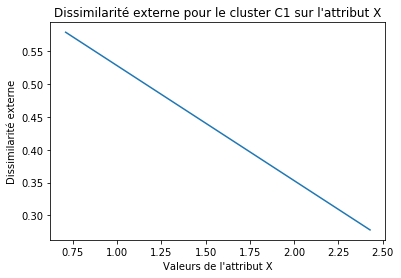

In [37]:
# calculer la typicalité pour l'attribut X pour le premier cluster
dissimilarity = dict()
for i in best[0]:
    dissimilarity[df3.iloc[i][df3.columns[0]]] = at.dissimilarity_w(i, best, best_b, df3,0,distances)
import operator
sorted_typ = sorted(dissimilarity.items(), key=operator.itemgetter(0))
x1, y1 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x1, y1)
plt.title("Dissimilarité externe pour le cluster C1 sur l'attribut X")
plt.xlabel("Valeurs de l'attribut X")
plt.ylabel("Dissimilarité externe")
plt.show()

In [45]:
print('max', np.max(np.asarray(list(dissimilarity.values()))))
print('moyenne ', np.mean(np.asarray(list(dissimilarity.values()))))

max 0.5778881623109308
moyenne  0.5251696789603175


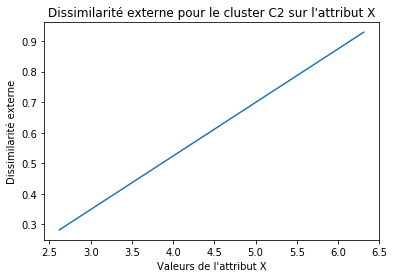

In [38]:
# calculer la typicalité pour l'attribut X pour le deuxieme cluster
dissimilarity = dict()
for i in best[1]:
    dissimilarity[df3.iloc[i][df3.columns[0]]] = at.dissimilarity_w(i, best, best_b, df3,0,distances)
import operator
sorted_typ = sorted(dissimilarity.items(), key=operator.itemgetter(0))
x2, y2 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x2, y2)
plt.title("Dissimilarité externe pour le cluster C2 sur l'attribut X")
plt.xlabel("Valeurs de l'attribut X")
plt.ylabel("Dissimilarité externe")
plt.show()

In [48]:
print('max', np.max(np.asarray(list(dissimilarity.values()))))
print('aire sous la courbe ', np.trapz(y,x))
print('moyenne ', np.mean(np.asarray(list(dissimilarity.values()))))

max 0.9300293575604242
aire sous la courbe  2.369258485953502
moyenne  0.5251696789603175


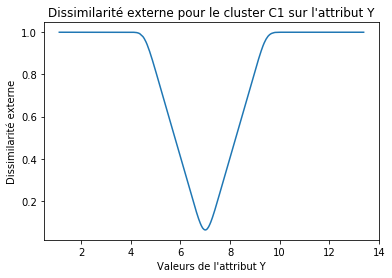

In [39]:
# calculer la typicalité pour l'attribut Y pour le premier cluster
dissimilarity = dict()
for i in best[0]:
    dissimilarity[df3.iloc[i][df3.columns[1]]] = at.dissimilarity_w(i, best, best_b, df3,1,distances)
import operator
sorted_typ = sorted(dissimilarity.items(), key=operator.itemgetter(0))
x3, y3 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x3, y3)
plt.title("Dissimilarité externe pour le cluster C1 sur l'attribut Y")
plt.xlabel("Valeurs de l'attribut Y")
plt.ylabel("Dissimilarité externe")
plt.show()

In [50]:
print('max', np.max(np.asarray(list(dissimilarity.values()))))
print('aire sous la courbe ', np.trapz(y,x))
print('moyenne ', np.mean(np.asarray(list(dissimilarity.values()))))

max 1.0
aire sous la courbe  9.813347387906555
moyenne  0.5492041617192018


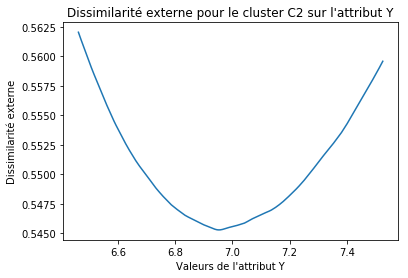

In [40]:
# calculer la typicalité pour l'attribut Y pour le deuxieme cluster
dissimilarity = dict()
for i in best[1]:
    dissimilarity[df3.iloc[i][df3.columns[1]]] = at.dissimilarity_w(i, best, best_b, df3,1,distances)
import operator
sorted_typ = sorted(dissimilarity.items(), key=operator.itemgetter(0))
x4, y4 = zip(*sorted_typ) # unpack a list of pairs into two tuples
plt.plot(x4, y4)
plt.title("Dissimilarité externe pour le cluster C2 sur l'attribut Y")
plt.xlabel("Valeurs de l'attribut Y")
plt.ylabel("Dissimilarité externe")
plt.show()

In [52]:
print('max', np.max(np.asarray(list(dissimilarity.values()))))
print('aire sous la courbe ', np.trapz(y,x))
print('moyenne ', np.mean(np.asarray(list(dissimilarity.values()))))

max 0.5628500485097723
aire sous la courbe  0.5885139618739577
moyenne  0.5492041617192018


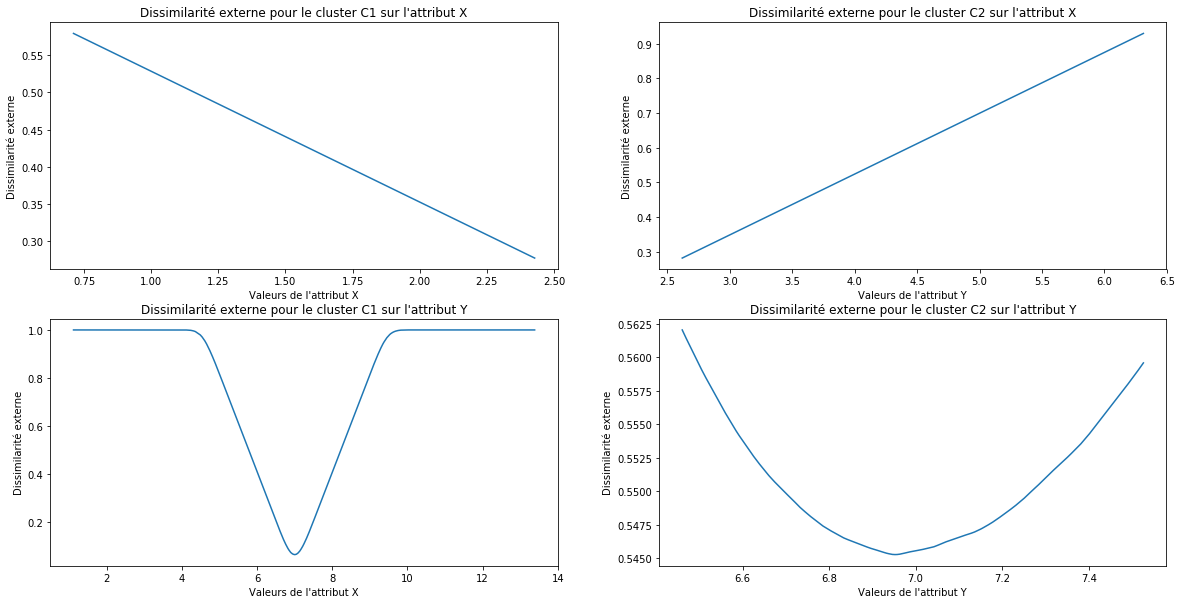

In [41]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax1.plot(x1, y1)
ax1.set_title("Dissimilarité externe pour le cluster C1 sur l'attribut X")
ax1.set_xlabel("Valeurs de l'attribut X")
ax1.set_ylabel("Dissimilarité externe")

ax2 = plt.subplot(222)
ax2.plot(x2, y2)
ax2.set_title("Dissimilarité externe pour le cluster C2 sur l'attribut X")
ax2.set_xlabel("Valeurs de l'attribut Y")
ax2.set_ylabel("Dissimilarité externe")

ax3 = plt.subplot(223)
ax3.plot(x3, y3)
ax3.set_title("Dissimilarité externe pour le cluster C1 sur l'attribut Y")
ax3.set_xlabel("Valeurs de l'attribut X")
ax3.set_ylabel("Dissimilarité externe")
ax4 = plt.subplot(224)
ax4.plot(x4, y4)
ax4.set_title("Dissimilarité externe pour le cluster C2 sur l'attribut Y")
ax4.set_xlabel("Valeurs de l'attribut Y")
ax4.set_ylabel("Dissimilarité externe")
plt.show() 

Ces tests nous permettent de conclure que cette approche est non pértinente dans le sens ou on ne trouve aucune sémantique proche de cette qu'on a avec l'algorithme AWFCM.

#### Pour ce notebook egalement, plusieurs autres tests ont été effectués sur d'autres jeux de données et ne sont pas présents dans ce notebook car j'ai jugé ces derniers inutiles/impértinents.